In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 

data= pd.read_csv('/home/zakaria/projects/attrition_detection/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [65]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

the dataset has 1470 row and 35 columns , no missing values in any columns 
the dataset is also a mix of numerical and categorical columns

let's start with some univariate analysis and correct the type of the variables 

In [67]:
data['Education'].value_counts(dropna=False)

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [68]:
data['EmployeeCount'].value_counts(dropna=False)

EmployeeCount
1    1470
Name: count, dtype: int64

In [69]:
data['EnvironmentSatisfaction'].value_counts(dropna=False)

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [70]:
data['JobInvolvement'].value_counts(dropna=False)

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [71]:
data['JobLevel'].value_counts(dropna=False)

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [72]:
data['JobSatisfaction'].value_counts(dropna=False)

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [73]:
data['Over18'].value_counts(dropna=False)

Over18
Y    1470
Name: count, dtype: int64

In [74]:
data['PerformanceRating'].value_counts(dropna=False)

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [75]:
data['RelationshipSatisfaction'].value_counts(dropna=False)

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [76]:
data['StandardHours'].value_counts(dropna=False)

StandardHours
80    1470
Name: count, dtype: int64

In [77]:
data['StockOptionLevel'].value_counts(dropna=False)

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [78]:
data['WorkLifeBalance'].value_counts(dropna=False)

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [79]:
for col in data.columns :
    if data[col].nunique() == 1:
        print(col)

EmployeeCount
Over18
StandardHours


Some columns here is in the datset are declared as numerical , however they're categorical ( ordinal if i have to be precise )

The ones we're talking about are :

--> Education

--> EnvironmentSatisfaction

--> JobInvolvement

--> JobLevel

--> JobSatisfaction

--> PerformanceRating

--> RelationshipSatisfaction

--> StockOptionLevel

--> WorkLifeBalance


Also i noticed the presence of some constant columns that wwouldn't have any effect on the study later on :

--> EmployeeCount

--> Over18

--> StandardHours

we'll extract them from the study however we'll keep the modality or the unique values , in order to flag new values 


In [80]:
categorical_cols = [ 'Education' ,'EnvironmentSatisfaction' ,'JobInvolvement' ,'JobLevel' ,'JobSatisfaction' ,'PerformanceRating' ,
                    'RelationshipSatisfaction' ,'StockOptionLevel' ,'WorkLifeBalance']

constant_cols = ['EmployeeCount' ,'Over18', 'StandardHours']

In [84]:
for col in data.columns:
    if col in categorical_cols or data[col].dtype == 'object':
        data[col] = data[col].astype('category')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

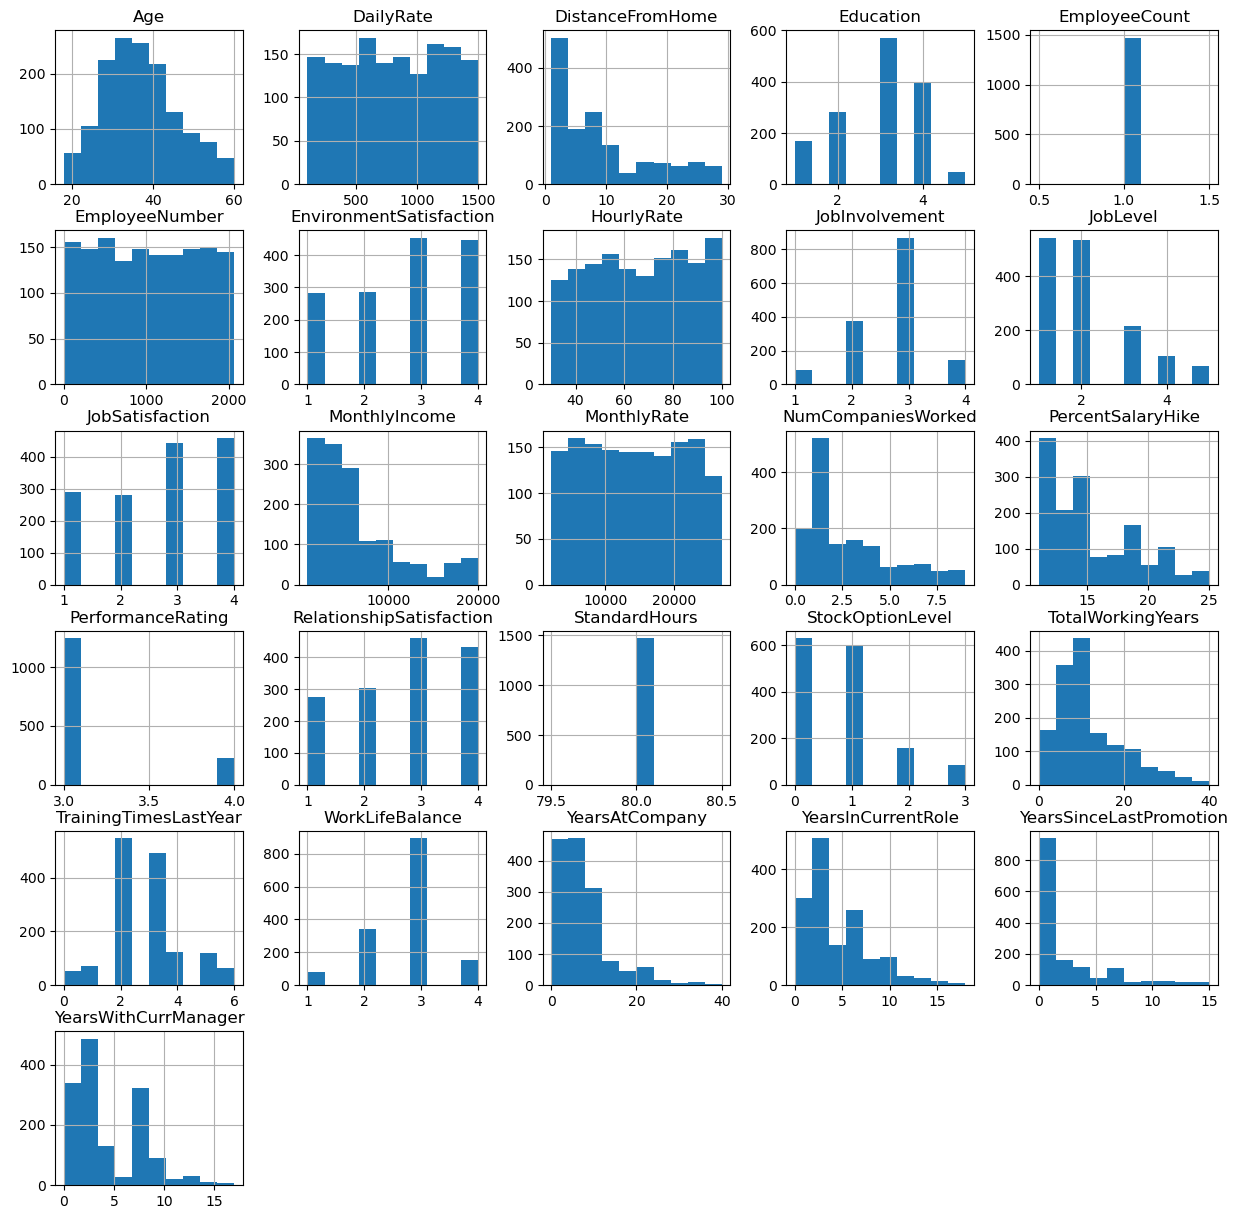

In [97]:
data.hist(figsize=(15,15))
plt.show()

Several insights can be drawn from the numerical feature distributions and their corresponding histograms:

Many variables exhibit right-skewed distributions, such as MonthlyIncome, DistanceFromHome, and YearsAtCompany. Applying appropriate data transformation techniques (e.g., logarithmic or Box–Cox transformations) may help normalize these features before model training.

The Age variable follows an approximately normal distribution, slightly skewed to the right, with most employees aged between 25 and 45 years.

Both EmployeeCount and StandardHours show constant values across all observations, suggesting that they provide no discriminative information and can be safely removed from the dataset.

The EmployeeNumber variable displays a nearly uniform distribution, indicating that it likely serves as a unique identifier rather than a predictive feature.

Text(0.5, 1.0, 'Distribution of the attrition categories ')

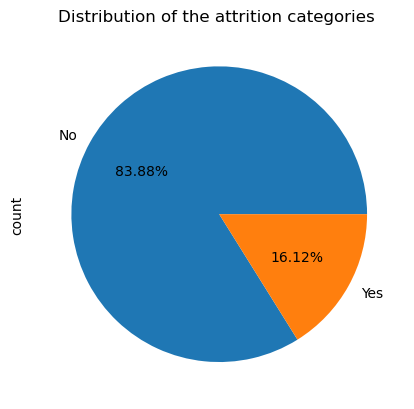

In [101]:
data['Attrition'].value_counts().plot(kind ='pie', autopct = '%1.2f%%' )
plt.title('Distribution of the attrition categories ')

In [102]:
from scipy.stats import norm, skew

(mu, sigma) = norm.fit(data.loc[data['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(data.loc[data['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))



Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9
